# Introduction.
The CIFAR-10 dataset contains 60,000 color images of 32 x 32 pixels in 3 channels divided into 10
classes. Each class contains 6,000 images. The training set contains 50,000 images, while the test sets
provides 10,000 images. This image taken from the CIFAR repository ( <a href = "https://www.cs.toronto.edu/~kriz/cifar.html">https://www.cs.toronto.edu/~kriz/cifar.html </a>). This is a classification problem with 10 classes (muti-label classification).


The challenge is to recognize previously unseen images and assign them to one of the 10 classes.

Ok Let's get started.

# Load CIFAR-10 dataset

In [1]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


# Let's look at some images

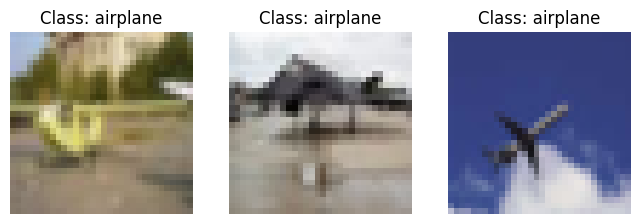

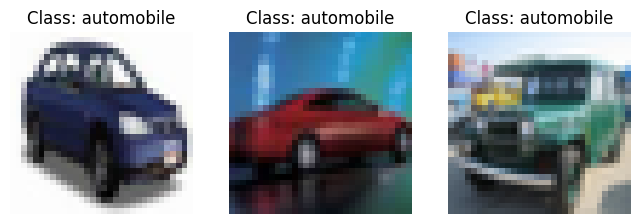

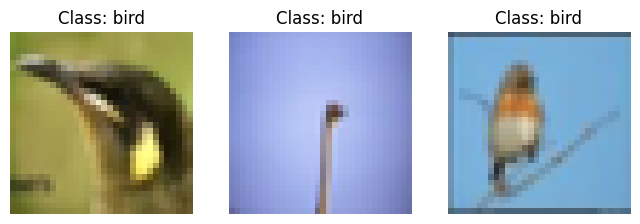

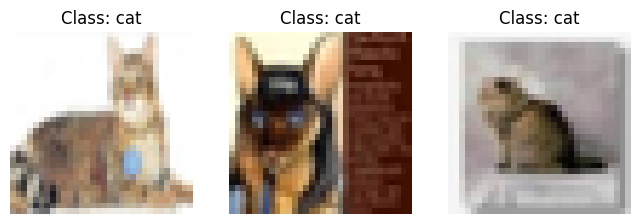

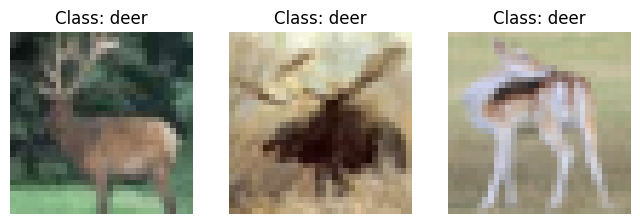

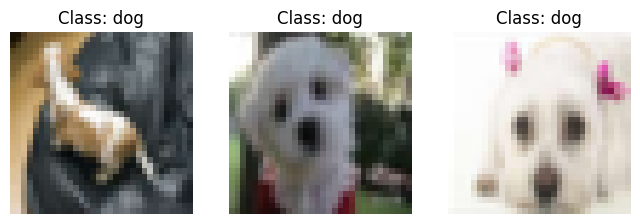

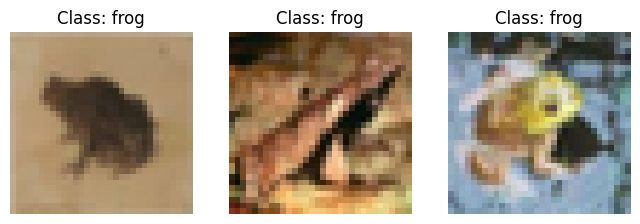

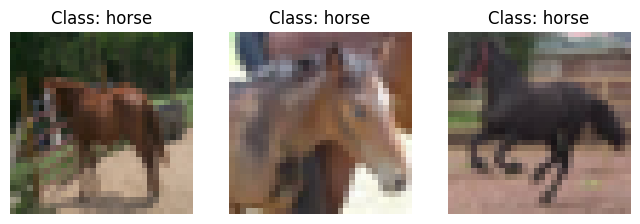

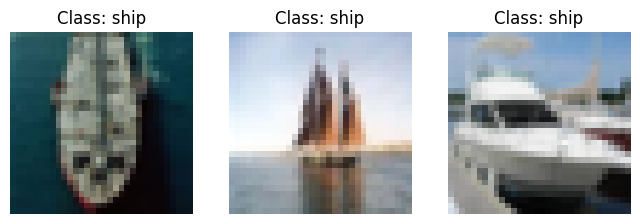

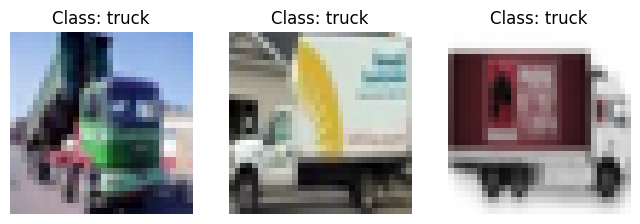

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Loop through each class
for class_idx in range(10):
    # Find indices of images belonging to the current class
    class_indices = np.where(y_train == class_idx)[0]

    # Randomly select 3 images from the current class
    selected_indices = random.sample(list(class_indices), 3)

    # Plot the selected images
    plt.figure(figsize=(8, 3))
    for i, idx in enumerate(selected_indices):
        plt.subplot(1, 3, i + 1)
        plt.imshow(x_train[idx])
        plt.title(f"Class: {class_names[class_idx]}")
        plt.axis('off')
    plt.show()

# Normalize the data

Normalizing input for an artificial neural network improves convergence and training stability by ensuring consistent scale and reducing the impact of different feature magnitudes.

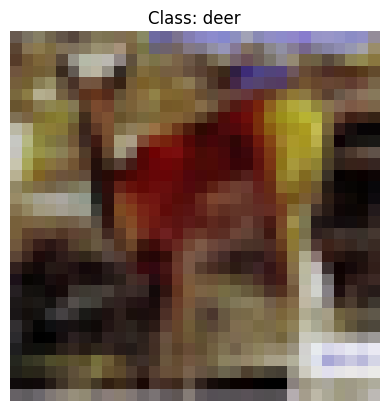

Maximum pixel value: 243
Minimum pixel value: 0
Average pixel value: 79.33919270833333


In [6]:
# Select a random image from the training set
random_index = random.randint(0, len(x_train) - 1)
image = x_train[random_index]
label = y_train[random_index][0]  # Extract the label from the array

# Display the image
plt.imshow(image)
plt.title(f"Class: {class_names[label]}")
plt.axis('off')
plt.show()

print(f"Maximum pixel value: {np.max(image)}")
print(f"Minimum pixel value: {np.min(image)}")
print(f"Average pixel value: {np.mean(image)}")

In [7]:
# Normalize the x values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

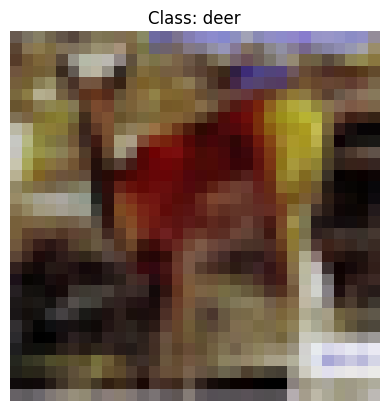

Maximum pixel value: 0.9529411792755127
Minimum pixel value: 0.0
Average pixel value: 0.31113409996032715


In [8]:
image = x_train[random_index]
label = y_train[random_index][0]  # Extract the label from the array

# Display the image
plt.imshow(image)
plt.title(f"Class: {class_names[label]}")
plt.axis('off')
plt.show()

print(f"Maximum pixel value: {np.max(image)}")
print(f"Minimum pixel value: {np.min(image)}")
print(f"Average pixel value: {np.mean(image)}")

# Create a model

In [12]:
# Create a basic cnn model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [13]:
# Train the model
history = model.fit(x_train, y_train, epochs=50,
                    validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3424 - loss: 1.7756 - val_accuracy: 0.5339 - val_loss: 1.3200
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5533 - loss: 1.2495 - val_accuracy: 0.5868 - val_loss: 1.1697
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6191 - loss: 1.0745 - val_accuracy: 0.6396 - val_loss: 1.0285
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6592 - loss: 0.9680 - val_accuracy: 0.6583 - val_loss: 0.9720
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6848 - loss: 0.9008 - val_accuracy: 0.6756 - val_loss: 0.9362
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7031 - loss: 0.8432 - val_accuracy: 0.6900 - val_loss: 0.8947
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7180 - loss: 0.8028 - val_accuracy: 0.6742 - val_loss: 0.9533
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7339 - loss: 0.7522

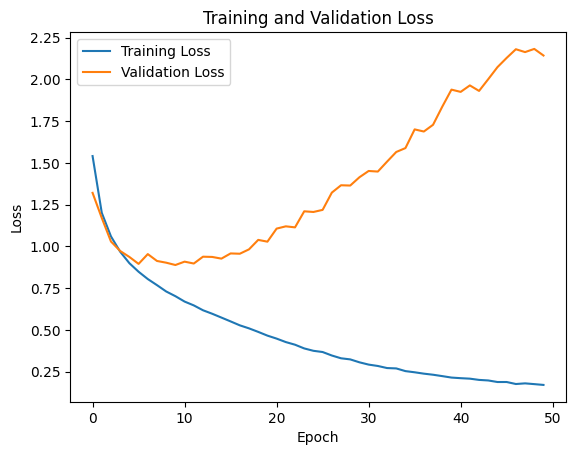

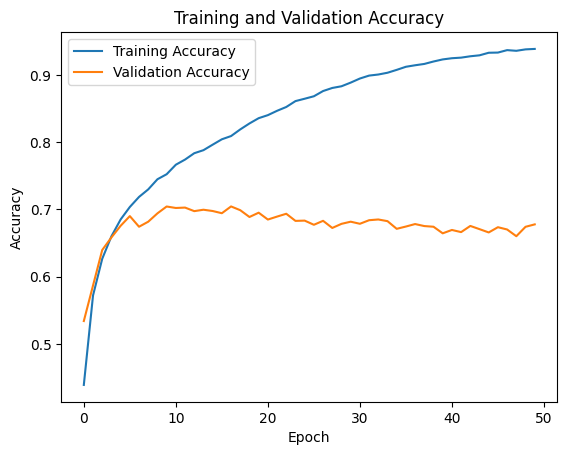

In [14]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

The model is overfitting. Shouldv'e stopped the training at *epoch 12*.

We will learn about **Overfitting vs. Underfitting** and **Bias vs. Variance** in the upcoming classes.

# Evaluate the model

In [15]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.6777 - loss: 2.1423

Test accuracy: 0.6776999831199646


# Check a random prediction

(32, 32, 3)
(1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
[[  3.8077598  13.929317  -15.712774   -9.063339    1.8069812  -7.1638103
  -14.476646   -6.9756293   1.4588451  20.193739 ]]


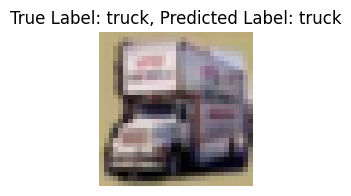

In [16]:
# Get a random image from the test set
random_index = random.randint(0, len(x_test) - 1)
image = x_test[random_index]
label = y_test[random_index][0]

print(image.shape)
print(np.expand_dims(image, axis=0).shape)

# Make a prediction
prediction = model.predict(np.expand_dims(image, axis=0))
print(class_names)
print(prediction)
predicted_label = np.argmax(prediction)

# Display the image and its predicted label
plt.figure(figsize=(2, 2))
plt.imshow(image)
plt.title(f"True Label: {class_names[label]}, Predicted Label: {class_names[predicted_label]}")
plt.axis('off')
plt.show()

# Upload your own data

In [17]:
def preprocess_image(image):
    image = image.resize((32, 32))  # Resize to CIFAR-10 dimensions
    image = np.array(image) / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

Saving bird.jpg to bird.jpg
User uploaded file "bird.jpg" with length 227403 bytes


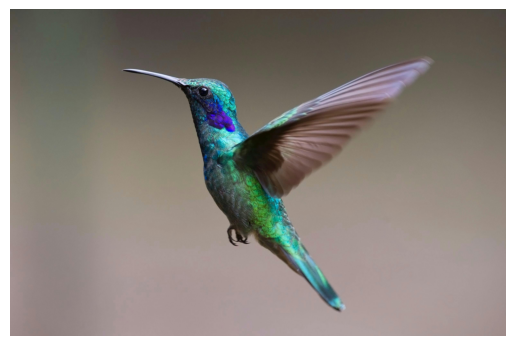

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


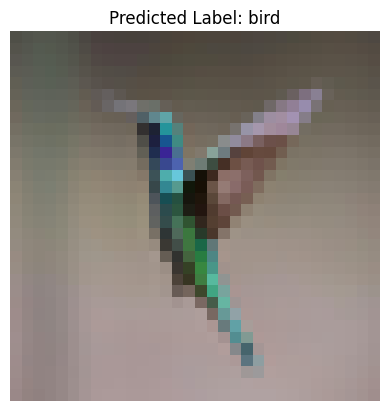

In [18]:
# prompt: option to upload an image

from google.colab import files
from PIL import Image
import io

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

    image = Image.open(io.BytesIO(uploaded[fn]))
    # Look at the uploaded image
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Preprocess the uploaded image
    preprocessed_image = preprocess_image(image)

    # Now you can use 'preprocessed_image' for prediction with your model:
    prediction = model.predict(preprocessed_image)
    predicted_label = np.argmax(prediction)

    plt.imshow(np.squeeze(preprocessed_image))  # Remove batch dimension for display
    plt.title(f"Predicted Label: {class_names[predicted_label]}")
    plt.axis('off')
    plt.show()